In [1]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d

#32 sites
data_0 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_14_23/2023_01_14_01_01_01_193L32.npy',allow_pickle=True).tolist()
data_1 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_14_23/2023_01_14_11_46_05_754L32.npy',allow_pickle=True).tolist()
data_2 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_14_23/2023_01_14_01_01_00_108L32.npy',allow_pickle=True).tolist()
data_3 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_14_23/2023_01_14_01_01_00_903L32.npy',allow_pickle=True).tolist()

In [2]:
# data = [data_20,data_24,data_28,data_32]
# N = [20,24,28,32]
data = [data_0,data_1,data_2,data_3]
#N = [20,24,28,32]
N = [32,32,32,32]
t = []
detuning = [] 
rabi = [] 
E = [] 
overlap = []
z_list = []
zz_list = []
zg_list = []
zzg_list = []

for i in range(len(N)):
    t.append(np.array(data[i]['nT'])[:,1]) # scan time
    detuning.append(np.array(data[i]['nT'])[:,3]) # detuning
    rabi.append(np.array(data[i]['nT'])[:,2]) # Rabi
    E.append(np.array(data[i]['E'])) # energy for the lowest three states
    overlap.append(np.array(data[i]['overlap']))# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
    z_list.append(np.array(data[i]['z'])) # rydberg population  
    zz_list.append(np.array(data[i]['zz']))# correlation of the rydbegrg population
    zg_list.append(np.array(data[i]['zg']))# rydberg population for the ground state
    zzg_list.append(np.array(data[i]['zzg']))# correlation of the rydberg population for the ground state
    print('i',i)
    print(zzg_list[i].shape)

i 0
(174, 32, 32)
i 1
(213, 32, 32)
i 2
(251, 32, 32)
i 3
(309, 32, 32)


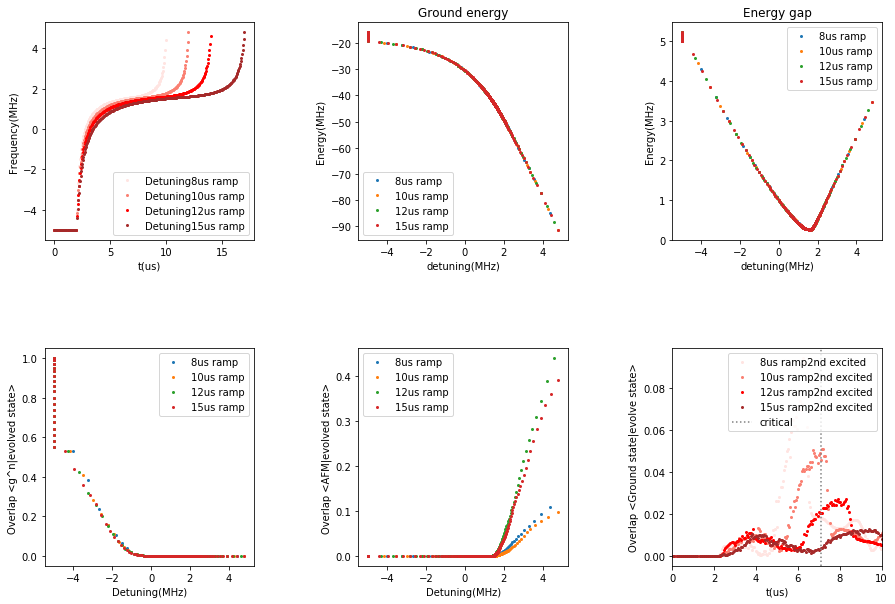

In [28]:
ms = 2
ls = ''
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
color_list = ['mistyrose', 'salmon','red','brown']
for i in range(len(N)):
    label0 = str(int(data[i]['params']['T_DiLILA']))+'us ramp'
    ax[0,0].plot(t[i],detuning[i],marker='o',markersize = ms,ls = ls,label = 'Detuning'+label0 ,color = color_list[i])
  #  ax[0,0].plot(t[i],rabi[i],marker='o',markersize = ms,ls = ls)
    ax[0,1].plot(detuning[i],(E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[0,2].plot(detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,0].plot(detuning[i],overlap[i][:,0],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,1].plot(detuning[i],overlap[i][:,1],marker='o',markersize = ms,ls = ls,label= label0)
    #ax[1,2].plot(t[i],overlap[i][:,2]+overlap[i][:,3],marker='o',markersize = ms,ls = ls,label= label0,color = color_list[i])
    ax[1,2].plot(t[i],overlap[i][:,4],marker='o',markersize = ms,ls = ls,label= label0+'2nd excited',color = color_list[i])
    
ax[1,2].set_xlim([0,10])


ax[1,2].axvline(7.1,color = 'grey',ls = ':',label ='critical')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
#ax[0,0].set_title('Rabi or Detuning')
ax[0,0].legend()
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].set_title('Ground energy')
ax[0,1].legend()
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')
ax[0,2].set_title('Energy gap')
ax[0,2].legend()
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|evolved state>')
ax[1,0].legend()
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|evolved state>')
ax[1,1].legend()
ax[1,2].set_xlabel('t(us)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')
ax[1,2].legend()



In [29]:
crit_id_list = []
for i in range(len(N)):
    print('i =',i)
    label0 = str(int(data[i]['params']['T_DiLILA']))+'us ramp'

    print(label0)
  #  print(np.array([gap,detuning[i]])
    gap = (E[i][:,2]-E[i][:,0])/2/np.pi
    crit_id = np.argmin(gap)
    crit_id_list.append(crit_id)
    print('intial_detuning'+str(detuning[i][0]))
    print('intial_gap'+str(gap[0]))
    print('crit_id ', crit_id)
    print('crit_t'+str(t[i][crit_id]))
    print('crit_detuning'+str(detuning[i][crit_id]))
    print('crit_gap'+str(gap[crit_id]))
    print('final_detuning'+str(detuning[i][-1]))
    print('final_gap'+str(gap[-1]))

          
        

i = 0
8us ramp
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  117
crit_t7.043999999999978
crit_detuning1.5827522494589894
crit_gap0.2491813923905883
final_detuning4.401231527093104
final_gap3.052584321421412
i = 1
10us ramp
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  142
crit_t8.34399999999997
crit_detuning1.5851191255070491
crit_gap0.24917412738951913
final_detuning4.803118040088404
final_gap3.4626165825958184
i = 2
12us ramp
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  166
crit_t9.59199999999996
crit_detuning1.584070573196984
crit_gap0.24917366698706586
final_detuning4.612280701753746
final_gap3.268378689859891
i = 3
15us ramp
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  203
crit_t11.515999999999945
crit_detuning1.5851191255070485
crit_gap0.24917413526904397
final_detuning4.803118040088336
final_gap3.4626165824887933


In [5]:
# there is even-odd splitting problem and we need to finish that 

In [6]:
sigma_1_list = []
sigma_2_list = []
x_list = []
for i in range(len(N)):
    sigma1 = [] # single body sigma field
    sigma2 = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(data[i]['zz'])):
        n_temp = np.array(data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1.append(sigma_temp)
        
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2.append(temp_g)
    sigma2 = np.array(sigma2)
    sigma2 = sigma2.reshape(len(data[i]['zg']),N[i])
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)


In [7]:
sigma_1_g_list = []
sigma_2_g_list = []
x_list = []
for i in range(len(N)):
    sigma1_g = [] # single body sigma field
    sigma2_g = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(data[i]['zg'])):
        n_temp = np.array(data[i]['zg'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(data[i]['zzg'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1_g.append(sigma_temp)
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2_g.append(temp_g)
    sigma2_g = np.array(sigma2_g)
    sigma2_g = sigma2_g.reshape(len(data[i]['zg']),N[i])
    sigma_1_g_list.append(sigma1_g)   
    sigma_2_g_list.append(sigma2_g)
    

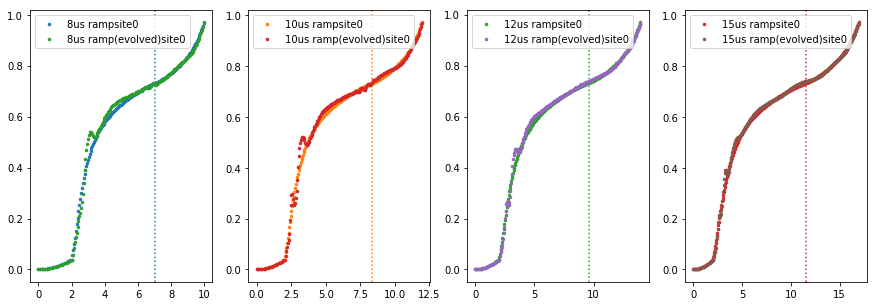

In [8]:
# rydberg state correlation with site m

m = 0
ms = 5
fig, ax = plt.subplots(1, len(N), figsize=(15,5))

for j_n, j in enumerate(range(len(N))):
    label0 = str(int(data[j]['params']['T_DiLILA']))+'us ramp'

    ax[j].axvline(t[j][crit_id_list[j]],markersize = ms,ls = ':',color = 'C%d'%j_n)
    ax[j].plot(t[j],zg_list[j][:,0]+zg_list[j][:,1],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'site0')        
    ax[j].plot(t[j],z_list[j][:,0]+z_list[j][:,1],markersize = ms,marker='.',color = 'C%d'%(j_n+2),ls = '',label= label0+'(evolved)'+'site0')
        

       # ax[i//5,i%5].set_ylim([-0.1,1])
    ax[j].legend()

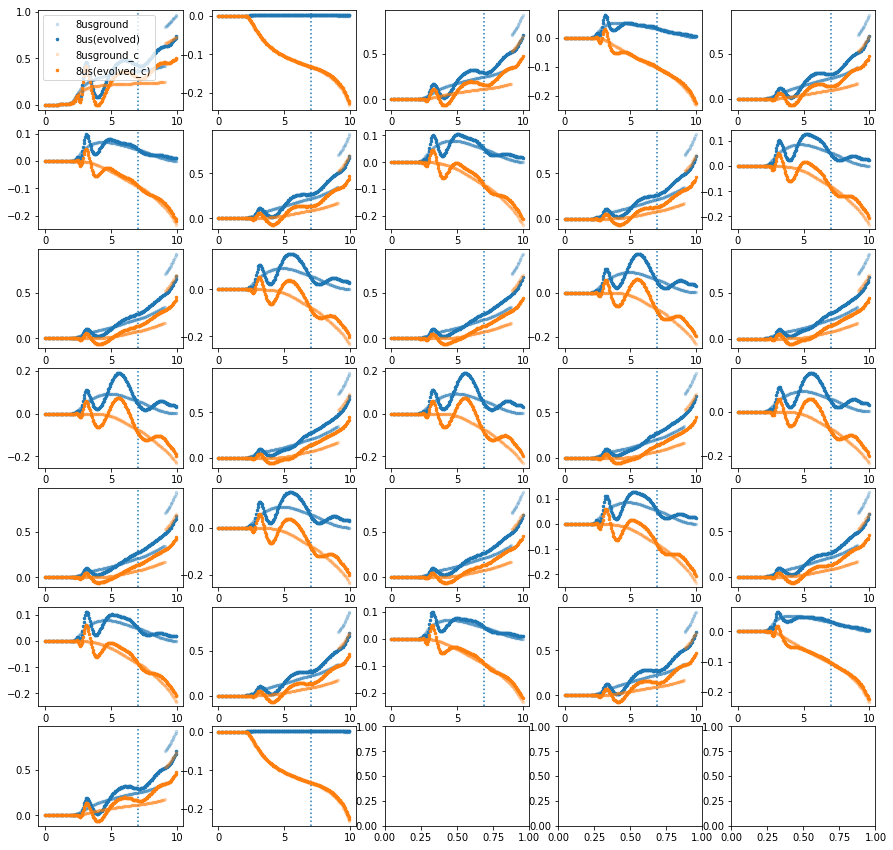

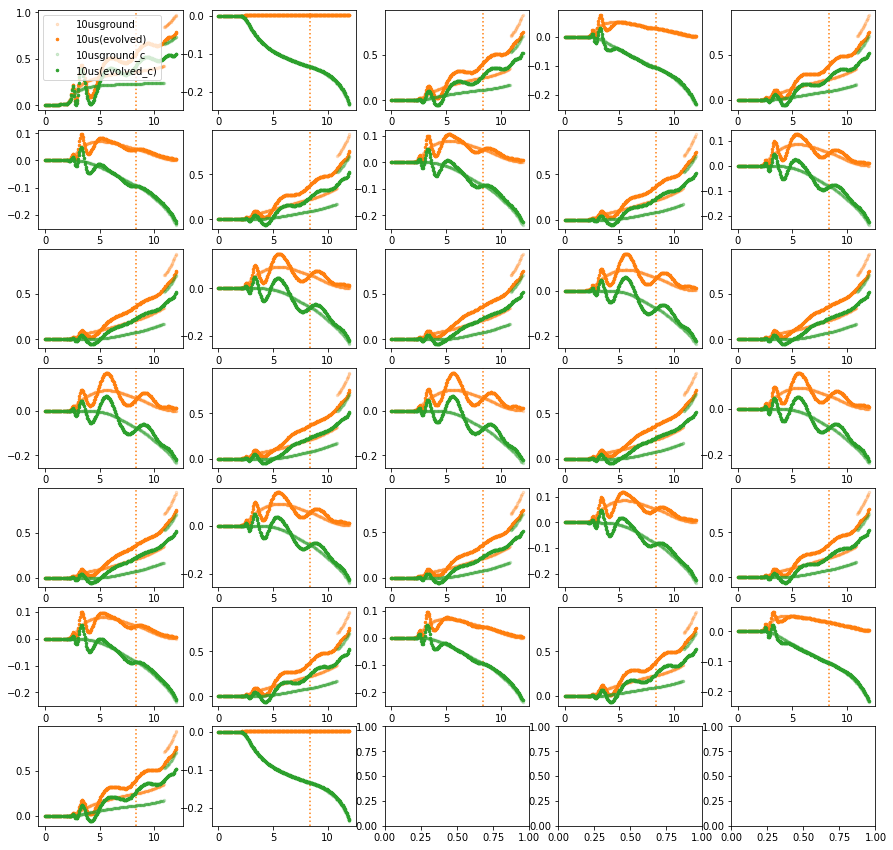

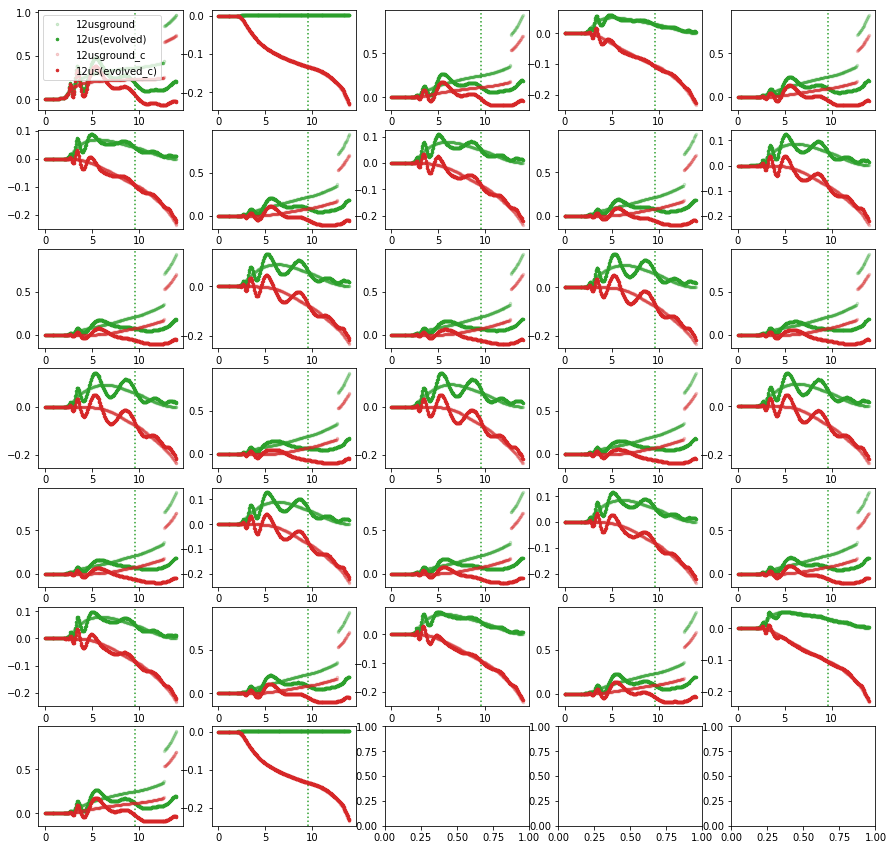

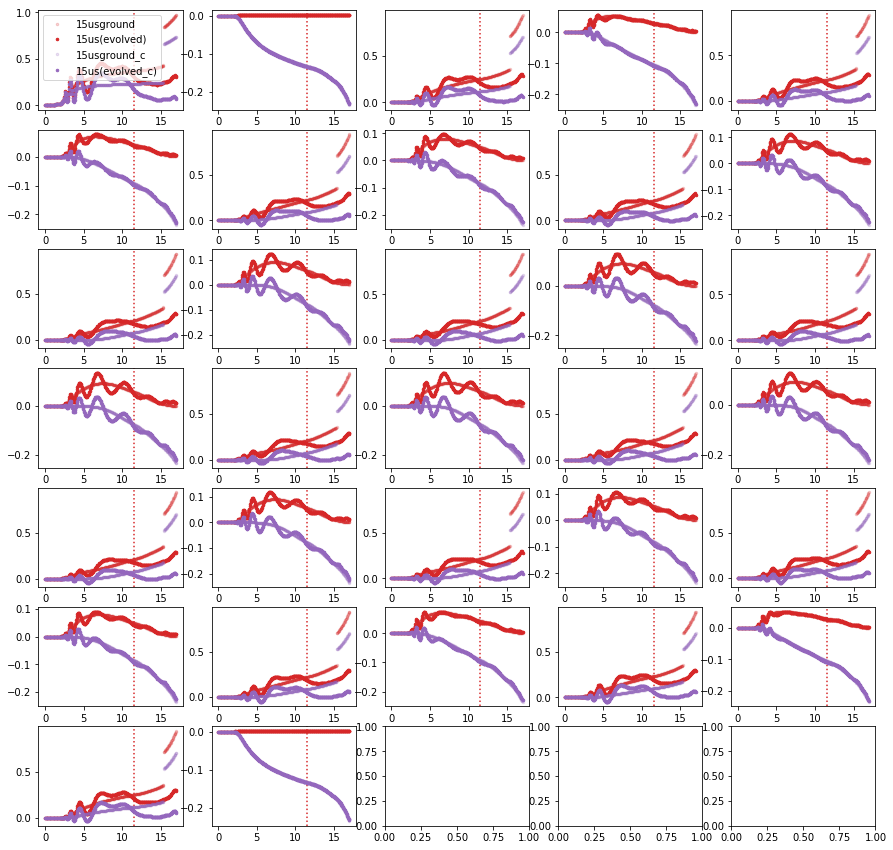

In [110]:
# rydberg state correlation with site m

m = 0
ms = 5
for j_n, j in enumerate(range(len(N))):
    fig, ax = plt.subplots(7, 5, figsize=(15,15))
    for i in range(N[j]):
#         print(t[j])
#         print(zzg_list[j][:,m,i])
        label0 = str(int(data[j]['params']['T_DiLILA']))+'us'
        mean = np.mean(z_list[j][:],axis = 1)
        mean_g = np.mean(zg_list[j][:],axis = 1)
        ax[i//5,i%5].axvline(t[j][crit_id_list[j]],markersize = ms,ls = ':',color = 'C%d'%j_n)
        ax[i//5,i%5].plot(t[j],zzg_list[j][:,m,i],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'ground',alpha = 0.2)        
        ax[i//5,i%5].plot(t[j],zz_list[j][:,m,i],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'(evolved)')
        ax[i//5,i%5].plot(t[j],zzg_list[j][:,m,i]-mean_g**2,markersize = ms,marker='.',color = 'C%d'%(j_n+1),ls = '',label= label0+'ground_c',alpha = 0.2)        
        ax[i//5,i%5].plot(t[j],zz_list[j][:,m,i]-mean**2,markersize = ms,marker='.',color = 'C%d'%(j_n+1),ls = '',label= label0+'(evolved_c)')

        

       # ax[i//5,i%5].set_ylim([-0.1,1])
    ax[0,0].legend()

20
24
28
32


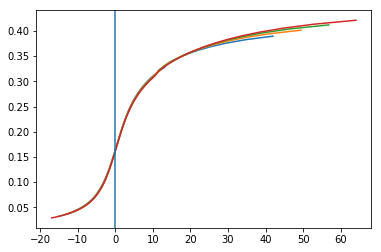

In [17]:
for i_n,i in enumerate(range(len(N))):
    print(len(x_list[i]))
    temp = sigma_2_g_list[i]
    plt.plot((detuning[i][50:]-1.57)*len(x_list[i])**0.9,np.sum(temp,axis=1)[50:]/len(x_list[i])**0.83)
#plt.yscale('log')
plt.axvline(0)
#plt.ylim([0.1,0.8])

In [18]:
detuning[i][50:]

array([0.82247557, 0.85405148, 0.88396653, 0.9123484 , 0.93931201,
       0.96496107, 0.98938943, 1.0126822 , 1.03491678, 1.05616367,
       1.07648725, 1.09594643, 1.11459521, 1.13248318, 1.14965596,
       1.16615562, 1.18202095, 1.19728786, 1.21198957, 1.22615691,
       1.23981848, 1.25300089, 1.26572892, 1.27802567, 1.28991268,
       1.30141011, 1.31253679, 1.32331037, 1.3337474 , 1.34386341,
       1.35367299, 1.36318984, 1.37242688, 1.38139627, 1.39010948,
       1.39857733, 1.40681004, 1.41481726, 1.42260814, 1.43019134,
       1.43757503, 1.444767  , 1.45177461, 1.45860487, 1.46526443,
       1.47175959, 1.47809639, 1.48428053, 1.49031748, 1.49621241,
       1.50197029, 1.50759585, 1.51309358, 1.5184678 , 1.52372263,
       1.52886199, 1.53388966, 1.53880923, 1.54362416, 1.54833775,
       1.55295316, 1.55747343, 1.56190147, 1.56624008, 1.57049193,
       1.57465961, 1.57874559, 1.58275225, 1.58668187, 1.59053667,
       1.59431874, 1.59803014, 1.60232664, 1.60750116, 1.61286

20
24
28
32


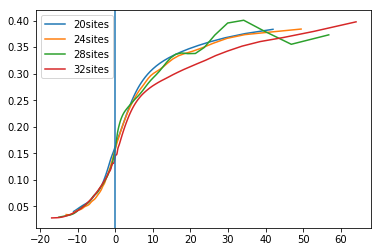

In [19]:
for i_n,i in enumerate(range(len(N))):
    print(len(x_list[i]))
    temp = sigma_2_list[i]
    plt.plot((detuning[i][50:]-1.57)*len(x_list[i])**0.9,np.sum(temp,axis=1)[50:]/len(x_list[i])**0.83,label= str(N[i])+'sites')
#plt.yscale('log')
plt.legend()
plt.axvline(0)
#plt.ylim([0.1,0.8])

20
24
28
32


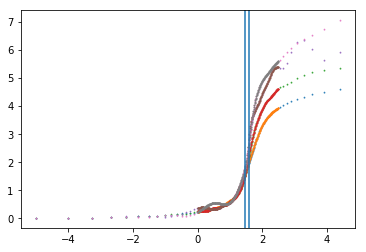

In [20]:
sampled_x = np.arange(0,2.5,0.01)
sampled_y = []
for i_n,i in enumerate(range(len(N))):
#for i_n,i in enumerate([0,1,3]):
    print(len(x_list[i]))
    temp = sigma_2_list[i]
    x = detuning[i][20:]
    y = np.sum(temp,axis=1)[20:]
    interp_func = interp1d(x, y)
    interp_y = interp_func(sampled_x)
    sampled_y.append(interp_y)
    plt.plot(x,y,marker = '^',markersize = 1, ls ='')
    plt.plot(sampled_x,interp_y,marker = 'o',markersize = 1,ls ='')
#plt.yscale('log')
plt.axvline(1.6)
plt.axvline(1.45)
sampled_y = np.array(sampled_y)
#plt.ylim([0.1,0.8])

In [21]:
# generate artificial scaling data from master curve
 # with rho_c == 1.0, nu == 2.0, zeta == 0.0
l = N
#l = [N[i] for i in [0,1,3]]
rho = sampled_x
l_mesh, rho_mesh = np.meshgrid(l, rho, indexing='ij')
y = sampled_y
dy = y / 100.
a = y
da = dy
res = fssa.autoscale(l=l, rho=rho, a=a, da=da, rho_c0=1.58, nu0=1., zeta0=1.)
res

           dnu: 0.01696936174700509
          drho: 0.02515978788632453
         dzeta: 0.06582768644768205
        errors: array([0.02515979, 0.01696936, 0.06582769])
 final_simplex: (array([[1.71167004, 1.01653421, 1.00056316],
       [1.7115057 , 1.01644825, 1.00032251],
       [1.71147662, 1.01654234, 1.00035902],
       [1.71154594, 1.01650285, 1.00024188]]), array([93.91982991, 93.92025099, 93.92025716, 93.92287562]))
           fun: 93.91982991003155
       message: 'Optimization terminated successfully.'
          nfev: 62
           nit: 24
            nu: 1.0165342061444402
           rho: 1.711670039926538
        status: 0
       success: True
         varco: array([[0.00063301, 0.00041257, 0.0006792 ],
       [0.00041257, 0.00028796, 0.00059573],
       [0.0006792 , 0.00059573, 0.00433328]])
             x: array([1.71167004, 1.01653421, 1.00056316])
          zeta: 1.0005631560651365

In [22]:
print(res.zeta,res.dzeta)
print(res.nu,res.dnu)
print(res.rho,res.drho)

1.0005631560651365 0.06582768644768205
1.0165342061444402 0.01696936174700509
1.711670039926538 0.02515978788632453


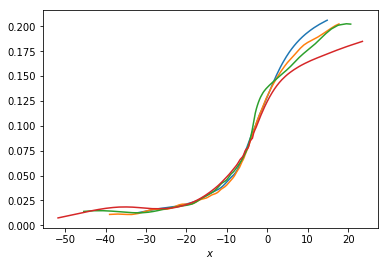

In [23]:
auto_scaled_data = fssa.scaledata(l, rho, a, da, res.rho, res.nu, res.zeta)
fig, ax = plt.subplots()
for i in range(len(auto_scaled_data.x)):
    ax.plot(auto_scaled_data.x[i,:],auto_scaled_data.y[i,:])

ax.set_xlabel(r'$x$')
plt.show()

In [24]:
print(res.rho, res.nu, res.zeta)

1.711670039926538 1.0165342061444402 1.0005631560651365


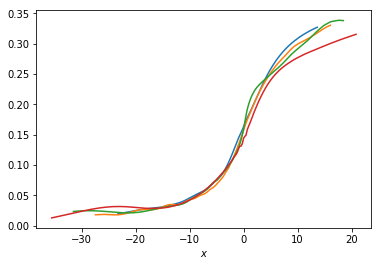

In [25]:
auto_scaled_data = fssa.scaledata(l, rho, a, da, 1.57, 1/0.9, 0.83/0.9)
fig, ax = plt.subplots()
for i in range(len(auto_scaled_data.x)):
    ax.plot(auto_scaled_data.x[i,:],auto_scaled_data.y[i,:])

ax.set_xlabel(r'$x$')
plt.show()

# for i_n,i in enumerate(range(len(N))):
#     print(len(x_list[i]))
#     temp = sigma_2_g_list[i]
#     plt.plot((detuning[i][50:]-1.57)*len(x_list[i])**0.9,np.sum(temp,axis=1)[50:]/len(x_list[i])**0.83)
# #plt.yscale('log')
# plt.axvline(0)
# #plt.ylim([0.1,0.8])

In [ ]:
for i_n,i in enumerate(range(len(N))):
    print(len(x_list[i]))
    temp = sigma_2_list[i]
    plt.plot(detuning[i][50:],np.sum(temp,axis=1)[50:]/len(x_list[i])**0.5)
#plt.yscale('log')
plt.axvline(1.55)
#plt.ylim([0.1,0.8])

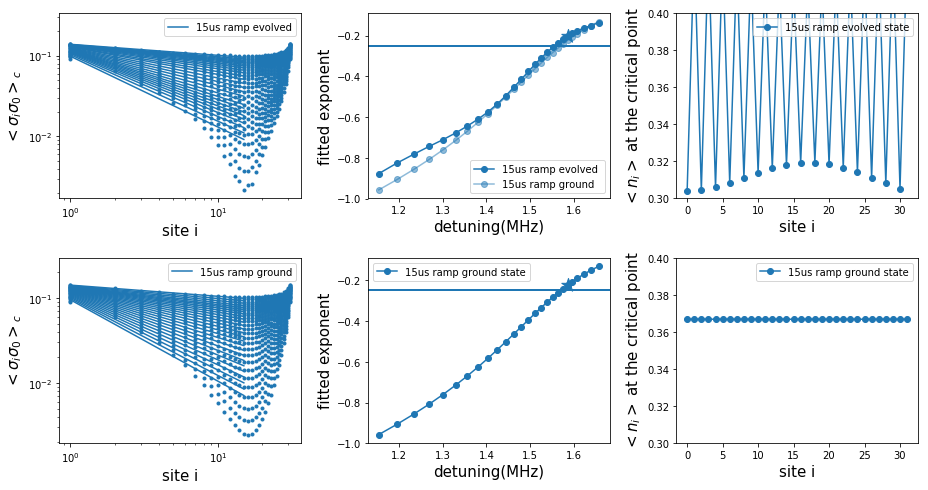

In [31]:
fs = 15
def power_law(x, a, b):
    return a * x**b
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(13,7))
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
for i_n,i in enumerate(range(3,4)):
    label0 = str(int(data[i]['params']['T_DiLILA']))+'us ramp'

    ax[0,0].plot([],[],label = label0+' evolved',color='C%d'%i_n )
    ax[0,0].legend()
    ax[1,0].plot([],[],label = label0+' ground',color='C%d'%i_n )
    ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []

    for it,t_id in enumerate(range(crit_id_list[i]-100,crit_id_list[i]+30,5)):
        detuning_list.append(detuning[i][t_id])
        ax[0,0].plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' ,color='C%d'%i_n)
        ax[1,0].plot(x_list[i],sigma_2_g_list[i][t_id],marker = '.',ls = '' ,color='C%d'%i_n)
        
        fit_range = int(N[i]/2-2)
        xdata = np.arange(1,fit_range)
        ydata = sigma_2_list[i][t_id,1:fit_range]
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(1, fit_range+1, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(1,fit_range)
        ydata_g = sigma_2_g_list[i][t_id,1:fit_range]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        #print(N[i],detuning[i][t_id],params_g_covariance[1,1]**0.5/params_g[1])
        xfit_g = np.linspace(1, fit_range+1, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)

        ax[0,0].plot(xfit, yfit, '-',color='C%d'%i_n)
        ax[1,0].plot(xfit_g, yfit_g, '-',color='C%d'%i_n)

    
        if t_id == crit_id_list[i]:
                ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
                ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' evolved state',marker = 'o')

    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' ground state',marker = 'o')

               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' evolved ')
    ax[0,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground ',alpha =0.5)

    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend()
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

    ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()

    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()
 #   plt.suptitle('ground state',fontsize=fs,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

In [344]:
t_id_range = range(189,190,1)
t_id_range[1]

IndexError: range object index out of range

In [ ]:
# benchmark ground state dynamics 
ms = 5
ls = ':'
fig, ax = plt.subplots(4, 5, figsize=(15,10))
for i in range(N[0]):
    ax[0,0].plot(t[0],z_list[0][:,i],markersize = ms,ls = ls,label='site'+str(i+1))
    ax[i//5,i%5].legend()

In [ ]:
# plot for ground state
fs = 15
def power_law(x, a, b):
    return a * x**b
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(13,7))
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
for i_n,i in enumerate(range(2,3,1)):
    ax[0,0].plot([],[],label = str(N[i])+'sites,evolved',color='C%d'%i_n )
    ax[0,0].legend()
    ax[1,0].plot([],[],label = str(N[i])+'sites,ground',color='C%d'%i_n )
    ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []
    for it,t_id in enumerate(range(160,190,10)):
        detuning_list.append(detuning[i][t_id])
        ax[0,0].plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' ,color='C%d'%i_n)
        ax[1,0].plot(x_list[i],sigma_2_g_list[i][t_id],marker = '.',ls = '' ,color='C%d'%i_n)
        
        fit_range = int(N[i]/2-2)
        xdata = np.arange(1,fit_range)
        ydata = sigma_2_list[i][t_id,1:fit_range]
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(1, fit_range+1, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(1,fit_range)
        ydata_g = sigma_2_g_list[i][t_id,1:fit_range]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        xfit_g = np.linspace(1, fit_range+1, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)

        ax[0,0].plot(xfit, yfit, '-',color='C%d'%i_n)
        ax[1,0].plot(xfit_g, yfit_g, '-',color='C%d'%i_n)

    
        if t_id == crit_id_list[i]:
                ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
                ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= str(N[i])+'sites'+' evolved state',marker = 'o')
    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= str(N[i])+'sites'+' ground state',marker = 'o')

               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= str(N[i])+'sites'+' evolved state')
    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= str(N[i])+'sites'+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend()
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

    ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()

    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()

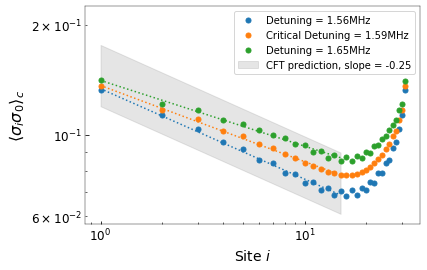

In [345]:
ms = 10
#plt.plot(x_list[i],sigma_2_list[i][75],marker = '.',ls = '' ,color='grey',ms = ms,label = 'Disordered state')
#plt.plot(x_list[i],sigma_2_list[i][-1],marker = '.',ls = '' ,color='black',ms = ms,label = 'Detuning = ')

for it,t_id in enumerate(range(crit_id_list[2]-10,crit_id_list[2]+20,10)):
    label_ = 'Detuning = %.2f' % detuning[i][t_id]+'MHz'
    if t_id == crit_id_list[2]:
        label_ = 'Critical Detuning = %.2f' % detuning[i][t_id]+'MHz'

    plt.plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' ,color='C%d'%it,ms = ms,label = label_)
    fit_range = int(N[i]/2-2)
    xdata = np.arange(1,fit_range)
    ydata = sigma_2_list[i][t_id,1:fit_range]
    params, params_covariance= curve_fit(power_law, xdata, ydata)
    xfit = np.linspace(1, fit_range+1, 100)
    yfit = power_law(xfit, params[0], params[1])
    plt.plot(xfit, yfit, ':',color='C%d'%it)
y0 = power_law(xfit, 0.85*params[0], -0.25)
y1 = power_law(xfit, 1.25*params[0], -0.25)

plt.fill_between(xfit,y0,y1,color = 'grey',alpha = 0.2,label = 'CFT prediction, slope = -0.25')
plt.xlabel('Site $i$',fontsize=14)
plt.ylabel('$\langle\sigma_i\sigma_0\\rangle_c$',fontsize = 16)
plt.xscale('log')
plt.yscale('log')    
plt.tick_params(axis='both',direction='in',labelsize=12,which='both')
plt.legend(fontsize=10,frameon=True)
plt.rcParams['axes.linewidth'] = 0.4

plt.savefig("sigma_correlator.svg")


N = 20 crit detuning1.566012378688489

N = 24 crit detuning1.5697215477424928

N = 28 crit detuning1.5714889113825392

N = 32 crit detuning1.5694099686594922


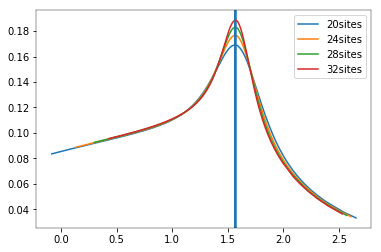

In [358]:
for i_n,i in enumerate(range(len(N))):
    print()
    temp =(-np.mean(zg_list[i],1)[50:-2]+np.mean(zg_list[i],1)[51:-1])/(detuning[i][51:-1]-detuning[i][50:-2])
    crit = np.argmax(temp)+50
    plt.plot(detuning[i][50:-2],temp,label = str(N[i])+'sites')
    plt.axvline(detuning[i][crit])
    print('N = '+str(len(x_list[i])),'crit detuning'+str(detuning[i][crit]))

#plt.yscale('log')
plt.legend()
#plt.ylim([0.1,0.8])

In [349]:
crit = np.argmax(temp)
crit

118

[]

SyntaxError: invalid syntax (<ipython-input-21-d3ea4644cad5>, line 1)

In [25]:
detuning[1][50:]

array([0.13137326, 0.1770006 , 0.22051937, 0.26207242, 0.30179   ,
       0.3397911 , 0.37618464, 0.4110705 , 0.44454048, 0.47667905,
       0.50756412, 0.53726762, 0.56585607, 0.59339111, 0.61992991,
       0.64552558, 0.6702275 , 0.6940817 , 0.71713107, 0.73941567,
       0.76097294, 0.78183792, 0.80204342, 0.82162023, 0.84059725,
       0.85900161, 0.87685885, 0.89419302, 0.91102677, 0.92738145,
       0.94327723, 0.95873317, 0.97376725, 0.98839653, 1.00263714,
       1.01650435, 1.03001268, 1.04317587, 1.05600697, 1.06851842,
       1.08072199, 1.09262892, 1.10424989, 1.11559509, 1.12667421,
       1.1374965 , 1.1480708 , 1.15840553, 1.16850875, 1.17838813,
       1.18805105, 1.19750454, 1.20675533, 1.21580988, 1.22467436,
       1.2333547 , 1.24185657, 1.25018542, 1.25834649, 1.26634479,
       1.27418514, 1.28187217, 1.28941035, 1.29680394, 1.30405708,
       1.31117372, 1.31815768, 1.32501265, 1.33174215, 1.33834961,
       1.34483832, 1.35121143, 1.35747203, 1.36362306, 1.36966

In [34]:
import random

In [38]:
random.randint(0,1000)

737